In [25]:
import pandas as pd
import os
import numpy as np
from config import apikey
import gmaps
import matplotlib.pyplot as plt

In [26]:
bcross_df = pd.read_csv('Border_Crossing_Entry_Data.csv')
overtime = bcross_df.drop(["Port Code","Border","Location","State"], axis=1)

In [42]:
measure = 'Personal Vehicles'
def cleantime(port, measure):
    wdf = overtime[overtime['Port Name'] == port]
    wdf = wdf[wdf['Measure'] == measure]
    wdf = wdf.drop(["Measure"], axis=1)
    wdf['Month'] = wdf['Date'].str.split(" ")
    wdf.loc[:, 'Day'] = wdf.Month.map(lambda x: x[0])
    del wdf['Date']
    del wdf['Month']
    return wdf
elpaso = cleantime('El Paso', measure)
sanysidro = cleantime('San Ysidro', measure)
laredo = cleantime('Laredo', measure)
detroit = cleantime('Detroit', measure)
buffalo = cleantime('Buffalo-Niagara Falls', measure)

compiled_df = pd.merge(elpaso, sanysidro, on="Day")
compiled_df1 = pd.merge(compiled_df, buffalo, on="Day")
compiled_df2 = pd.merge(compiled_df1, laredo, on="Day")
complete = pd.merge(compiled_df2,detroit, on="Day")
complete.columns = ['Port', 'El Paso Value', 'Day', 'Port1', 'San Ysidro Value', 'Port2', 'Buffalo Value', 'Port3', 'Laredo Value', 'Port4', 'Detroit Value']
complete = complete.set_index(["Day"])
complete


,Port,El Paso Value,Port1,San Ysidro Value,Port2,Buffalo Value,Port3,Laredo Value,Port4,Detroit Value
Day,,,,,,,,,,
03/01/2019,El Paso,982585,San Ysidro,1208832,Buffalo-Niagara Falls,357879,Laredo,445919,Detroit,342739
02/01/2019,El Paso,928499,San Ysidro,1039184,Buffalo-Niagara Falls,272159,Laredo,393922,Detroit,289017
01/01/2019,El Paso,1020507,San Ysidro,1164766,Buffalo-Niagara Falls,265748,Laredo,462863,Detroit,302622
12/01/2018,El Paso,969171,San Ysidro,1123026,Buffalo-Niagara Falls,372102,Laredo,462768,Detroit,328953
11/01/2018,El Paso,954517,San Ysidro,1090239,Buffalo-Niagara Falls,357432,Laredo,430834,Detroit,324501
...,...,...,...,...,...,...,...,...,...,...
05/01/1996,El Paso,1309448,San Ysidro,0,Buffalo-Niagara Falls,626536,Laredo,580331,Detroit,700713
04/01/1996,El Paso,1281485,San Ysidro,0,Buffalo-Niagara Falls,527932,Laredo,578858,Detroit,662496
03/01/1996,El Paso,1337009,San Ysidro,0,Buffalo-Niagara Falls,521725,Laredo,660703,Detroit,663216


In [47]:
epv = complete["El Paso Value"].mean()/30
syv = complete["San Ysidro Value"].mean()/30
bfv = complete["Buffalo Value"].mean()/30
lrv = complete["Laredo Value"].mean()/30
dtv = complete["Detroit Value"].mean()/30
ports = ['El Paso', 'San Ysidro', 'Buffalo', 'Laredo', 'Detroit']
avg = [epv, syv, bfv, lrv, dtv]
data = {'Port':ports, 'Average Traffic Per Day': avg} 

simple = pd.DataFrame(data) 
simple

,Port,Average Traffic Per Day
0,El Paso,36976.195818
1,San Ysidro,38478.421027
2,Buffalo,17110.982437
3,Laredo,16631.376105
4,Detroit,15850.007407


([<matplotlib.axis.XTick at 0x22f8d2bacc8>,
 <a list of 5 Text xticklabel objects>)

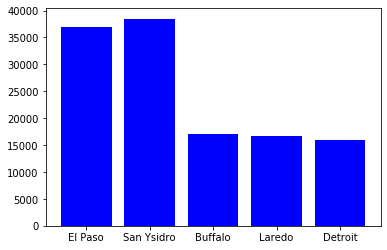

In [50]:
x_axis = np.arange(len(ports))
plt.bar(x_axis, avg, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ports)

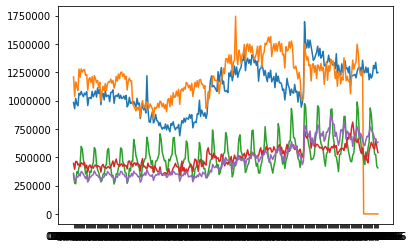

In [53]:
ElP = plt.plot(complete.index, complete['El Paso Value'])
SY = plt.plot(complete.index, complete['San Ysidro Value'])
BNF = plt.plot(complete.index, complete['Buffalo Value'])
Lar = plt.plot(complete.index, complete['Laredo Value'])
Det = plt.plot(complete.index, complete['Detroit Value'])